In [20]:
import scipy.io
import numpy as np
from random import shuffle
import scipy.ndimage
import os
import scipy.io as io
from numpy.linalg import matrix_rank
import matplotlib.pyplot as plt

In [22]:
# Aritificial image data creation

M = 50
N = 100 # data matrix size

toy_rank = 5    #  low-rank L(rank)
toy_card = 0.20 # cardinality of the sparse component

# generate random basis vectors
rows, cols = (toy_rank,N)
arr = [[np.random.rand(1) for i in range(cols)] for j in range(rows)]

r=np.round(arr,3)


# organising into a matrix

X0 = np.zeros((M,N))
for i in range(M):
    ind = int(np.floor(np.random.rand(1)[0]*(toy_rank-1) + 1))
    X0[i,:] = r[ind].ravel()
    
X0 = X0 - np.mean(X0[:])


# adding sparse noise
X1 = np.sign(np.random.rand(M,N) - 0.5)
X1 = X1 * (np.random.rand(M,N) < toy_card)
X = X0 + X1

In [23]:
# Default function values

max_iter=1000
lamb = 1 / np.sqrt(max(M,N))
mu = 10*lamb
tol = 1e-6

In [24]:
def RobustPCA(X, lamba, mu, tol, max_iter):
    
    M,N=np.shape(X)
    unobserved=np.isnan(X)
    X[unobserved]=0
    normX= np.linalg.norm(X,'fro')
    
    #intialasing
    L = np.zeros((M, N))
    S = np.zeros((M, N))
    Y = np.zeros((M, N))

    for iter in range(max_iter):
    # ADMM step: update L and S
        
        L = Do(1/mu, X - S + (1/mu)*Y)
        S = So(lamb/mu, X - L + (1/mu)*Y)

        # augmented lagrangian multiplier
        Z = X - L - S
        Z[unobserved] = 0 # skip NaN values
        Y = Y + mu*Z

        err = np.linalg.norm(Z, 'fro') / normX
        outLine ="iter: %d\terr:%f\trank(L):%d\t" % (iter, err, matrix_rank(L))
        print(outLine)

        #if (i == 1) or (np.mod(i, 10) == 0) or (err < tol):
            #print('i: %04d\terr: %f\trank(L): %d\tcard(S): %d\n', i, err, rank(L), nnz(S(~unobserved)))
        if err<tol:
            break
            
    return L,S

        
def So(tau,X):
    # Shrinkage Operator
    r = np.sign(X)*np.maximum(abs(X) - tau, 0)
    return r

def Do(tau,X):
    # Shrinkage operator for singular values
    U, S, V = np.linalg.svd(X,full_matrices=False)
    
    k=np.diag(So(tau,S))
    a=np.dot(U,k)
    r=np.dot(a,V)
    
    return r

In [25]:
L,S=RobustPCA(X, lamb, mu, tol, max_iter)

iter: 0	err:0.110758	rank(L):50	
iter: 1	err:0.010273	rank(L):50	
iter: 2	err:0.007663	rank(L):50	
iter: 3	err:0.007703	rank(L):50	
iter: 4	err:0.008239	rank(L):50	
iter: 5	err:0.009015	rank(L):50	
iter: 6	err:0.010156	rank(L):49	
iter: 7	err:0.011676	rank(L):46	
iter: 8	err:0.012673	rank(L):41	
iter: 9	err:0.012754	rank(L):36	
iter: 10	err:0.012115	rank(L):30	
iter: 11	err:0.011539	rank(L):22	
iter: 12	err:0.010688	rank(L):14	
iter: 13	err:0.010561	rank(L):10	
iter: 14	err:0.009383	rank(L):5	
iter: 15	err:0.007367	rank(L):4	
iter: 16	err:0.005393	rank(L):4	
iter: 17	err:0.003573	rank(L):4	
iter: 18	err:0.002412	rank(L):4	
iter: 19	err:0.002195	rank(L):4	
iter: 20	err:0.001527	rank(L):4	
iter: 21	err:0.000995	rank(L):4	
iter: 22	err:0.000708	rank(L):4	
iter: 23	err:0.000593	rank(L):4	
iter: 24	err:0.000464	rank(L):4	
iter: 25	err:0.000279	rank(L):4	
iter: 26	err:0.000133	rank(L):4	
iter: 27	err:0.000083	rank(L):4	
iter: 28	err:0.000070	rank(L):4	
iter: 29	err:0.000051	rank(L):4	
iter: 

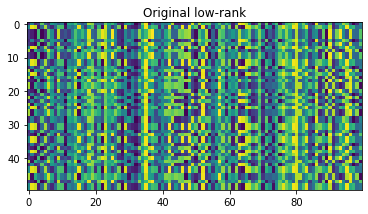

In [26]:
plt.imshow(X0)
plt.title('Original low-rank')
plt.savefig('Original low-rank.png')

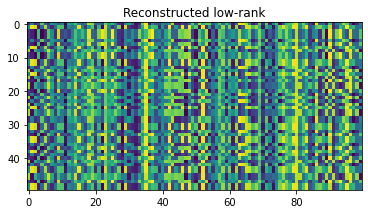

In [27]:
plt.imshow(L)
plt.title('Reconstructed low-rank')
plt.savefig('Reconstructed low-rank.png')

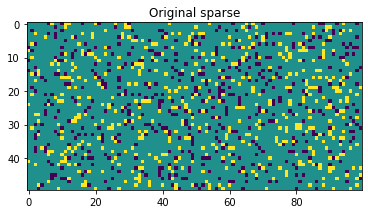

In [28]:
plt.imshow(X1)
plt.title('Original sparse')
plt.savefig('Original sparse.png')

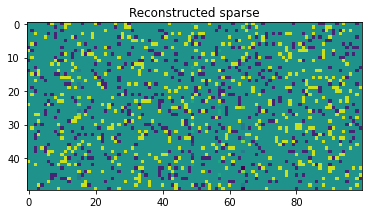

In [29]:
plt.imshow(S)
plt.title('Reconstructed sparse')
plt.savefig('Reconstructed sparse.png')

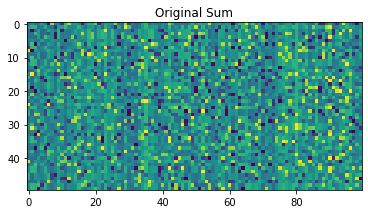

In [30]:
plt.imshow(X)
plt.title('Original Sum')
plt.savefig('Original Sum.png')

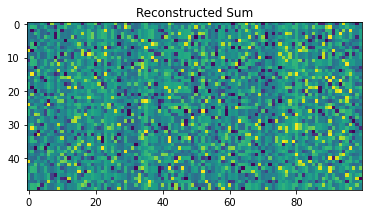

In [31]:
plt.imshow(L+S)
plt.title('Reconstructed Sum')
plt.savefig('Reconstructed Sum.png')